In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, ifft

# Сгенерируем сигнал и шум

In [ ]:
b = 60
w0 = 40*np.pi
v0 = 0
delta_t = 0.002
N = 51
T = 0.1
t0 = - 0.05
t1 = 0.05
n = np.arange(50)

In [ ]:
t_values = []
while t0 < t1:
  t_values = np.append(t_values, t0)
  t0 += delta_t
np.round(t_values, 3)

array([-0.05 , -0.048, -0.046, -0.044, -0.042, -0.04 , -0.038, -0.036,
       -0.034, -0.032, -0.03 , -0.028, -0.026, -0.024, -0.022, -0.02 ,
       -0.018, -0.016, -0.014, -0.012, -0.01 , -0.008, -0.006, -0.004,
       -0.002,  0.   ,  0.002,  0.004,  0.006,  0.008,  0.01 ,  0.012,
        0.014,  0.016,  0.018,  0.02 ,  0.022,  0.024,  0.026,  0.028,
        0.03 ,  0.032,  0.034,  0.036,  0.038,  0.04 ,  0.042,  0.044,
        0.046,  0.048])

In [ ]:
len(t_values)

50

In [ ]:
n

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
def bell_envelope_pulse(t, w0, v0, b):
  return np.exp(-(b**2 * t**2)) * np.cos( w0*t + v0)

In [ ]:
s = bell_envelope_pulse(t_values, w0, v0, b)

In [ ]:
np.random.seed(0)
eps = np.zeros(50)
for i in range(len(s)):
  eps[i] = np.random.normal(0, i*0.01)

In [ ]:
x = s + eps

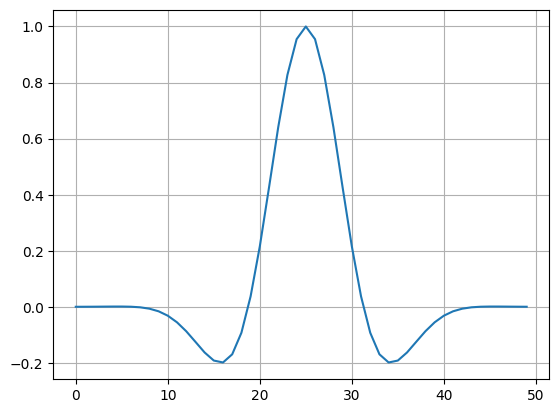

In [ ]:
plt.plot(s)
plt.grid(True)

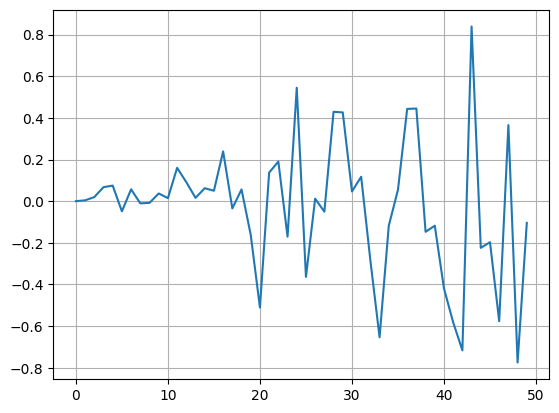

In [ ]:
plt.plot(eps)
plt.grid(True)

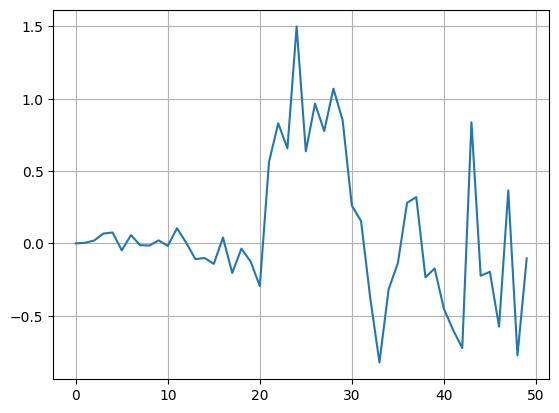

In [ ]:
plt.plot(x)
plt.grid(True)

# Построим окна


In [ ]:
from scipy.signal import triang

In [ ]:
# прямоугольное окно
W_pr = np.ones(len(s))

In [ ]:
# окно Бартлетта
W_bartlett = triang(len(s))

<ipython-input-15-f328c21f7809>:2: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  W_bartlett = triang(len(s))


In [ ]:
# окно Хемминга
W_Hamming = np.hamming(len(s))

In [ ]:
# окно Хеннинга
W_Hanning = np.hanning(len(s))

In [ ]:
# окно Блэкмана
W_Blackman = np.blackman(len(s))

# Выполним ДПФ и исследуем сигнал и шум

In [ ]:
y_signal = fft(s)

In [ ]:
y_eps = fft(eps)

In [ ]:
frequency_response_signal = np.abs(y_signal)
frequency_response_eps = np.abs(y_eps)

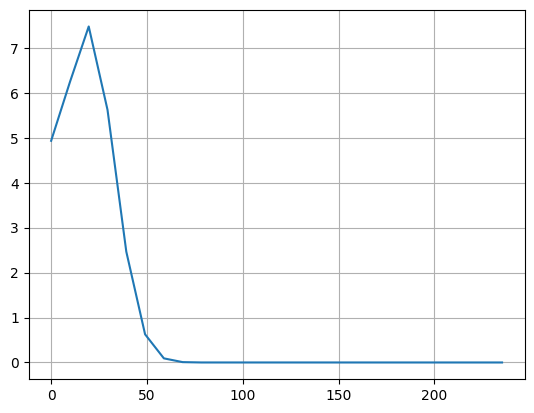

In [ ]:
plt.plot(f, frequency_response_signal[:N//2])
plt.grid(True)

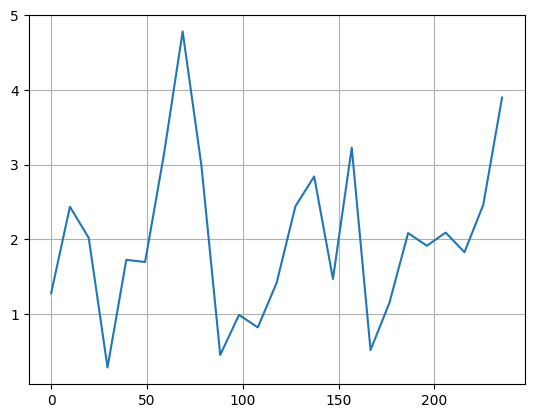

In [ ]:
plt.plot(f, frequency_response_eps[:N//2])
plt.grid(True)

# Построим фильтр низких частот и произведем фильтрацию

In [ ]:
f = np.fft.fftfreq(N, delta_t)
f = f[:N//2]

In [ ]:
f_3 = 25
f_4 = 60

In [ ]:
h = lambda k: 1 / (2 * np.pi * k * delta_t) * ((np.sin(2 * np.pi * k * delta_t * f_4) + np.sin(2 * np.pi * k * delta_t * f_3)) / (1 - 4 * k**2 * delta_t**2 * (f_4 - f_3)**2))

In [ ]:
N = x.shape[0]
M = len(s)

In [ ]:
h_data = [h(k) for k in range(1, M+1)]

In [ ]:
filtred_x = np.convolve(x, h_data, mode='full')[:N]/(4.5*N+1)

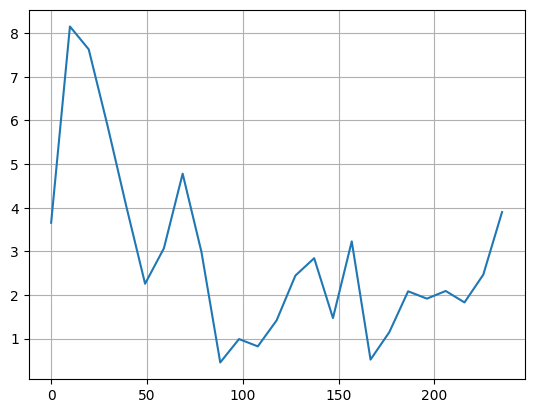

In [ ]:
plt.plot(f, np.abs(fft(x))[:N//2])
plt.grid(True)

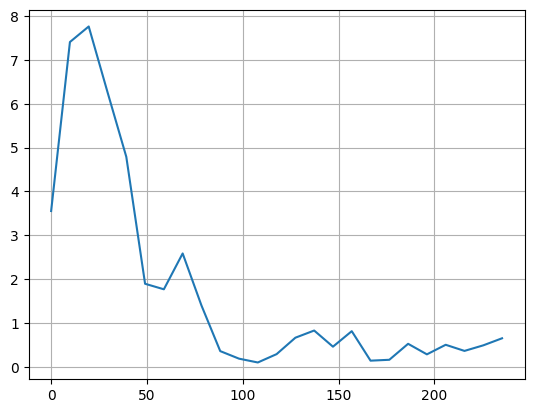

In [ ]:
plt.plot(f, np.abs(fft(filtred_x))[:N//2])
plt.grid(True)

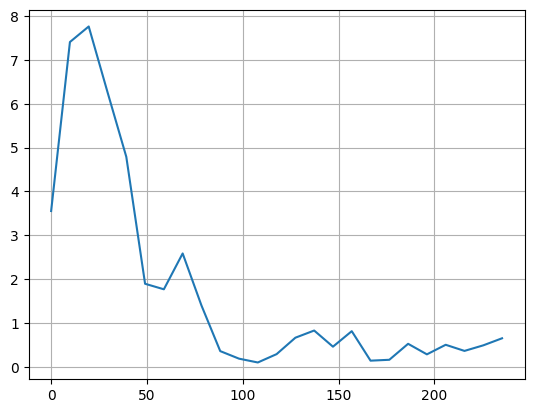

In [ ]:
plt.plot(f, np.abs(fft(filtred_x*W_pr))[:N//2])
plt.grid(True)

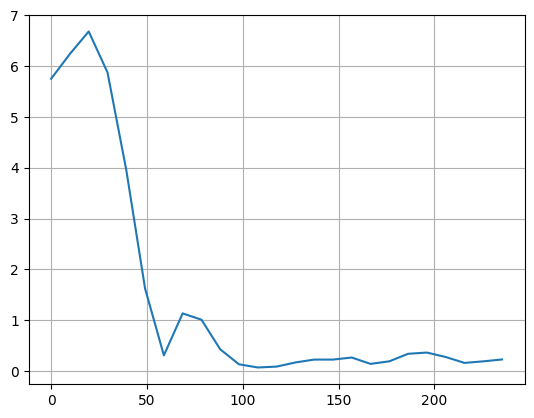

In [ ]:
plt.plot(f, np.abs(fft(filtred_x*W_Blackman))[:N//2])
plt.grid(True)

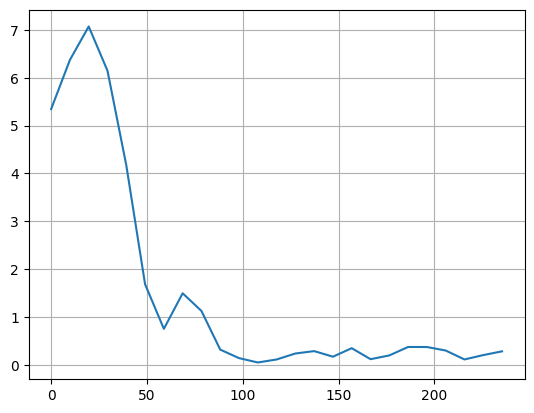

In [ ]:
plt.plot(f, np.abs(fft(filtred_x*W_Hamming))[:N//2])
plt.grid(True)

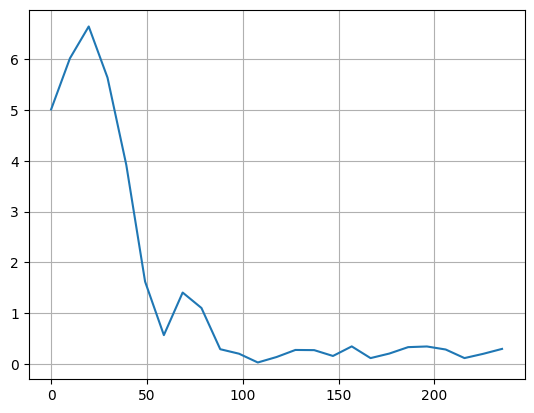

In [ ]:
plt.plot(f, np.abs(fft(filtred_x*W_bartlett))[:N//2])
plt.grid(True)

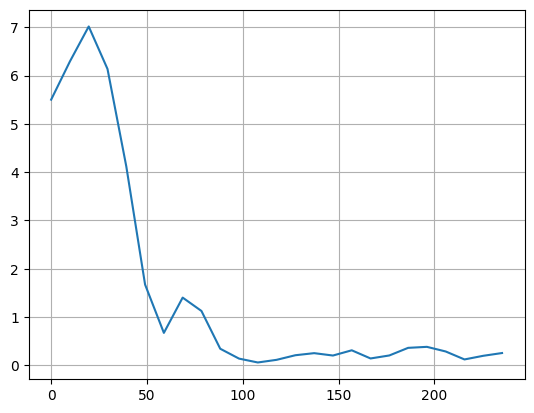

In [ ]:
plt.plot(f, np.abs(fft(filtred_x*W_Hanning))[:N//2])
plt.grid(True)